In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [66]:
model_modtype = load_model('temp/checkpoint/modtype_2.h5')
model_freqagility = load_model('temp/checkpoint/freq_agility_2.h5')
model_pwagility = load_model('temp/checkpoint/pw_agility_2.h5')
model_priagility = load_model('temp/checkpoint/pri_agility_2.h5')
model_pw = load_model('temp/checkpoint/pw_2.h5')
model_pri = load_model('temp/checkpoint/pri_2.h5')

In [67]:
data = np.load('training_data/gendata_test_2500_0.npy')
labels = np.load('training_data/gendata_test_2500_labels_0.npy')

In [68]:
x = data
y_emitter = labels[:,0]
y_emitter=y_emitter.astype(int)

leny=len(y_emitter)


y_modtype = labels[:,0]
y_freqagility = labels[:,1]
y_pwagility = labels[:,2]
y_priagility = labels[:,3]
y_pwmin = labels[:,4]
y_pwmax = labels[:,5]
y_primin = labels[:,6]
y_primax = labels[:,7]



In [69]:
yh_modtype = model_modtype.predict(x).argmax(1)

ix = (y_modtype != yh_modtype)
print(ix.sum(),'testing mistakes of',len(ix),'total predictions')
print('test error rate',round(ix.sum()/len(ix),3))
print('Accuracy', round(1-ix.sum()/len(ix),3))

79/79 [==============================] - 1s 9ms/step
452 testing mistakes of 2500 total predictions
test error rate 0.181
Accuracy 0.819


In [70]:
yh_freqagility = model_freqagility.predict(x).argmax(1)

ix = (y_freqagility != yh_freqagility)
print(ix.sum(),'testing mistakes of',len(ix),'total predictions')
print('test error rate',round(ix.sum()/len(ix),3))
print('Accuracy', round(1-ix.sum()/len(ix),3))

79/79 [==============================] - 1s 6ms/step
346 testing mistakes of 2500 total predictions
test error rate 0.138
Accuracy 0.862


In [71]:
yh_pwagility = model_pwagility.predict(x).argmax(1)

ix = (y_pwagility != yh_pwagility)
print(ix.sum(),'testing mistakes of',len(ix),'total predictions')
print('test error rate',round(ix.sum()/len(ix),3))
print('Accuracy', round(1-ix.sum()/len(ix),3))

79/79 [==============================] - 1s 5ms/step
1245 testing mistakes of 2500 total predictions
test error rate 0.498
Accuracy 0.502


In [72]:
yh_priagility = model_priagility.predict(x).argmax(1)

ix = (y_priagility != yh_priagility)
print(ix.sum(),'testing mistakes of',len(ix),'total predictions')
print('test error rate',round(ix.sum()/len(ix),3))
print('Accuracy', round(1-ix.sum()/len(ix),3))

79/79 [==============================] - 1s 8ms/step
217 testing mistakes of 2500 total predictions
test error rate 0.087
Accuracy 0.913


In [73]:
b_pwmin=15.286275640628888
m_pwmin=805.2782390280091
b_pwmax=25.039697983513843
m_pwmax=795.5248166851242

yh_pw = model_pw.predict(x)
yh_pwmin = yh_pw[:,0]#m_pwmin*yh_pw[:,0]+b_pwmin
yh_pwmax = m_pwmax*yh_pw[:,1]+b_pwmax
y_pwmin=(y_pwmin-b_pwmin)/m_pwmin
rmse_pwmin=np.sqrt(np.mean((y_pwmin-yh_pwmin)**2))
rmse_pwmax=np.sqrt(np.mean((y_pwmax-yh_pwmax)**2))
pcnterr_pwmin=np.mean(abs((y_pwmin-yh_pwmin)/y_pwmin))
pcnterr_pwmax=np.mean(abs((y_pwmin-yh_pwmin)/y_pwmin))
print('rmse pwmin:',rmse_pwmin,'rmse pwmax:',rmse_pwmax)
print('percent err pwmin:',pcnterr_pwmin*100,'percent err pwmax:',pcnterr_pwmax*100)
print(yh_pwmin)
print(y_pwmin)
print(np.mean(y_pwmin))

79/79 [==============================] - 1s 5ms/step
rmse pwmin: 0.06408959104109149 rmse pwmax: 68.90336223086031
percent err pwmin: 224.20537960443724 percent err pwmax: 224.20537960443724
[-0.00497407  0.02178133  0.00374448 ... -0.0060656   0.02111439
  0.00694381]
[-0.01407524  0.20413345 -0.0091304  ... -0.01768857  0.10505135
 -0.00644034]
0.0019078819379954061


In [74]:
pcnterr=abs((y_pwmin-yh_pwmin)/y_pwmin)
pcnterr

array([0.64660859, 0.89329856, 1.41011162, ..., 0.65708939, 0.79900883,
       2.07817384])

In [75]:
b_primin=15.286275640628888
m_primin=805.2782390280091
b_primax=25.039697983513843
m_primax=795.5248166851242

yh_pri = model_pri.predict(x)
yh_primin = m_pwmin*yh_pri[:,0]+b_primin
yh_primax = m_primax*yh_pri[:,1]+b_primax

rmse_primin=np.sqrt(np.mean((y_primin-yh_primin)**2))
rmse_primax=np.sqrt(np.mean((y_primax-yh_primax)**2))
pcnterr_primin=np.mean(abs((y_primin-yh_pwmin)/y_primin))
pcnterr_primax=np.mean(abs((y_primin-yh_pwmin)/y_primin))
print('rmse primin:',rmse_primin,'rmse primax:',rmse_primax)
print('percent err primin:',pcnterr_primin*100,'percent err primax:',pcnterr_primax*100)

79/79 [==============================] - 1s 7ms/step
rmse primin: 267.7482524157034 rmse primax: 385.37310083258166
percent err primin: 100.0605167517622 percent err primax: 100.0605167517622


In [76]:
# Categorical Prediction
yh = model.predict(x).argmax(1)
prediction = pd.DataFrame()
prediction['yh'] = yh
prediction['y'] = y
ix = (prediction.y != prediction.yh)
print(ix.sum(),'testing mistakes of',len(ix),'total predictions')
print('test error rate',round(ix.sum()/len(ix),3))
print('Accuracy', round(1-ix.sum()/len(ix),3))

NameError: name 'model' is not defined

In [ ]:
# # Numerical prediction
# yh = model.predict(x)
# prediction = pd.DataFrame()
# prediction['pw_pred'] = yh[:,0]
# prediction['pri_pred'] = yh[:,1]
# prediction['pw'] = y[:,0]
# prediction['pri'] = y[:,1]

In [ ]:
# prediction.head()

In [ ]:
cm = confusion_matrix(y, yh)
plt.matshow(cm)
plt.show()

NameError: name 'y' is not defined

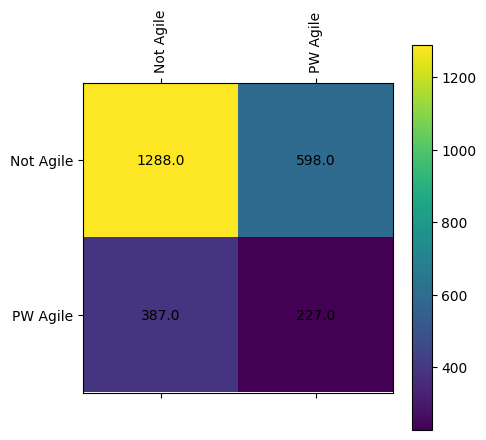

In [ ]:
cm = confusion_matrix(y, yh)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cax = ax.matshow(cm, interpolation='nearest')
fig.colorbar(cax)
plt.xticks(rotation=90, ha='center')
plt.xticks(np.arange(0, max(y)+1, 1.0))
plt.yticks(np.arange(0, max(y)+1, 1.0))
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)


for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()